# Final Project Step 6 w2v

```
Course:   DS 5001 
Module:   Final
Date:     8 May 2022
Author:   Thomas McIntyre gem5cm@virginia.edu
Purpose:  This notebook will utlize the data created in step 2 to get word embeddings.
```

In [1]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [2]:
data_home = "data"
local_lib = "code"
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

In [3]:
LIB = pd.read_csv(f"{data_home}/LIB.csv").set_index(OHCO[:1])
CORPUS = pd.read_csv(f"{data_home}/CORPUS.csv").set_index(OHCO)
VOCAB = pd.read_csv(f"{data_home}/VOCAB.csv").set_index("term_str")
BOW = pd.read_csv(f"{data_home}/BOW.csv").rename(columns = {"Unnamed: 2": "term_str"}).set_index(["book_id", "chap_num", "term_str"])
TFIDF = pd.read_csv(f"{data_home}/TFIDF.csv").set_index(CHAPS)
DOC = pd.read_csv(f"{data_home}/DOC.csv").set_index(CHAPS)

In [4]:
## Exclude proper nouns and save corpus table as TOKENS
TOKENS = CORPUS[~CORPUS.pos.str.match('NNPS?')]
TOKENS

pos_tuple pos  \
book_id chap_num para_num sent_num token_num                            
26654   1        0        0        0              ('PETER', 'NN')  NN   
                 1        0        0                ('All', 'DT')  DT   
                                   1          ('children,', 'NN')  NN   
                                   2             ('except', 'IN')  IN   
                                   3               ('one,', 'JJ')  JJ   
...                                                           ...  ..   
4       22       3        7        22               ('and', 'CC')  CC   
                                   23              ('down', 'RB')  RB   
                                   24              ('into', 'IN')  IN   
                                   25               ('the', 'DT')  DT   
                                   27                ('of', 'IN')  IN   

                                              token_str  term_str  
book_id chap_num para_num sent_num token_num                       
26654   1        0        0        0              PETER     peter  
                 1        0        0                All       all  
                                   1          children,  children  
                                   2             except    except  
                                   3               one,       one  
...                                                 ...       ...  
4       22       3        7        22               and       and  
                                   23              down      down  
                                   24              into      into  
                                   25               the       the  
                                   27                of        of  

[2103273 rows x 4 columns]

In [5]:
# Total GENSIM
SENTS = TOKENS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())
model = word2vec.Word2Vec(SENTS.values, window = 2, min_count = 50, vector_size = 256,seed = 2)

W2V = pd.DataFrame(model.wv.get_normed_vectors(), index=model.wv.index_to_key)
W2V.index.name = 'term_str'
W2V = W2V.sort_index()
W2V = W2V[:-1] # remove NaN row
W2V

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
term_str,,,,,,,,,,,,,,,,,,,,,
a,-0.065630,0.061151,-0.067592,-0.079754,-0.111042,0.024741,-0.099287,-0.095021,-0.089249,0.033697,...,-0.016811,-0.055880,0.084840,-0.052462,-0.048102,0.053794,-0.021232,-0.025916,0.008024,-0.011677
abandoned,-0.020185,0.051576,-0.032726,-0.049333,-0.032478,0.015905,0.104361,0.013451,-0.091870,-0.038174,...,-0.060394,0.069135,-0.044059,-0.010110,-0.051961,-0.027635,0.047187,0.042594,-0.062591,-0.041217
able,0.056912,0.088895,-0.003579,0.004173,0.002945,0.017587,0.067863,0.068430,-0.097584,-0.140719,...,-0.091737,0.003553,0.046481,-0.035758,-0.042728,-0.081914,0.105953,0.004781,-0.102811,-0.016851
about,-0.092493,-0.061504,0.073475,0.086362,-0.080984,-0.002191,0.086164,-0.047575,0.040994,-0.049156,...,0.006420,0.077507,-0.054729,0.091863,-0.080489,-0.083512,0.072793,0.031610,-0.007773,-0.074242
above,0.008802,-0.106642,0.059231,0.075570,0.020564,0.019017,0.045676,-0.082100,0.038428,-0.079204,...,0.001922,0.073866,-0.115616,0.066124,-0.011428,-0.053366,0.025434,-0.018666,-0.002597,0.006077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youre,0.007634,0.026956,-0.023600,0.106095,-0.085058,-0.043726,0.002989,-0.021838,0.050667,0.029100,...,-0.051343,0.022667,0.015662,0.077820,-0.017955,0.075912,0.062487,0.035981,0.024699,0.007878
yours,0.009170,0.122215,-0.052762,-0.012531,-0.097439,0.034756,0.029379,-0.042580,-0.123317,-0.043096,...,-0.082754,0.032021,0.048115,-0.062923,0.024921,0.050481,-0.010376,-0.010887,-0.066033,0.012511
yourself,0.116022,0.106293,0.008525,-0.032909,0.002385,0.007656,0.062215,-0.001506,0.012057,-0.055222,...,-0.137914,-0.007140,0.102565,-0.044845,0.002326,0.020346,0.092379,0.045185,0.009127,0.043776


In [6]:
# Total TSNE COORDS
tsne_engine = TSNE(learning_rate = 200, perplexity = 20, n_components = 2, init = 'random', n_iter = 1000, random_state = 42)
tsne_model = tsne_engine.fit_transform(W2V)
COORDS = pd.DataFrame(tsne_model, columns=['x','y'], index=W2V.index)\
    .join(VOCAB, how='left')[['x','y','n','max_pos']]
COORDS["logn"] = np.log(COORDS["n"])
COORDS = COORDS.dropna() # Remove words that are not in our vocab (subset some unwanted POS/Stopwords earlier)
COORDS

,x,y,n,max_pos,logn
term_str,,,,,
abandoned,-4.829220,63.321587,81.0,VBN,4.394449
able,-22.979696,29.881908,294.0,JJ,5.683580
abruptly,5.452937,32.894852,54.0,RB,3.988984
absence,-21.871826,-40.346817,100.0,NN,4.605170
accept,-63.280418,0.050643,69.0,VB,4.234107
...,...,...,...,...,...
young,-12.894113,4.215835,1246.0,JJ,7.127694
younger,-37.067760,-6.600684,181.0,JJR,5.198497
youre,-35.313580,41.685646,606.0,NN,6.406880


In [7]:
## RR Martin
RRMARTIN = LIB[LIB["author"] == "RR Martin"].index.tolist()
RRMARTIN_TOKENS= TOKENS.reset_index()
RRM_TOKENS = RRMARTIN_TOKENS[RRMARTIN_TOKENS["book_id"].isin(RRMARTIN)].set_index(OHCO)

# RR Martin GENSIM
RRM_SENTS = RRM_TOKENS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())
RRM_model = word2vec.Word2Vec(RRM_SENTS.values, window = 2, min_count = 50, vector_size = 256)

RRM_W2V = pd.DataFrame(RRM_model.wv.get_normed_vectors(), index=RRM_model.wv.index_to_key)
RRM_W2V.index.name = 'term_str'
RRM_W2V = RRM_W2V.sort_index()
RRM_W2V = RRM_W2V[:-1]
RRM_W2V.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
term_str,,,,,,,,,,,,,,,,,,,,,
a,0.000585,-0.037274,-0.061045,-0.061495,-0.041260,-0.018022,-0.002114,0.006311,0.050742,-0.019169,...,0.054302,0.026767,-0.004181,-0.030593,-0.028604,-0.042249,-0.043125,0.016082,-0.008124,-0.073131
abandoned,0.012691,0.016565,-0.011281,0.020547,0.068584,-0.007899,0.066703,-0.018504,-0.132730,0.035325,...,-0.029600,-0.057371,-0.036171,-0.074944,-0.088597,0.040910,-0.080483,0.053016,-0.108674,-0.007443
able,-0.070284,0.130291,-0.046148,-0.071085,0.017423,-0.039988,0.085603,0.097444,-0.052653,0.028754,...,-0.030612,-0.043241,-0.031717,0.048798,-0.100915,0.017082,-0.054575,-0.032022,-0.079025,-0.010365
about,0.022557,-0.011598,0.069297,0.110931,0.111265,-0.008605,0.033690,-0.022768,-0.041230,0.134224,...,-0.044603,0.068880,-0.046720,-0.044150,-0.087522,0.121624,0.015359,-0.082478,-0.020925,0.140295
above,0.051961,-0.026036,0.012569,0.135443,0.125593,-0.006138,0.059820,-0.008425,-0.069864,0.040411,...,-0.021401,-0.066236,0.037579,-0.065550,0.005184,0.011829,0.021937,-0.011857,-0.030516,0.010798


In [8]:
# RR MARTIN TSNE COORDS
tsne_engine = TSNE(learning_rate = 200, perplexity = 20, n_components = 2, init = 'random', n_iter = 1000, random_state = 42)
RRM_tsne_model = tsne_engine.fit_transform(RRM_W2V)
RRM_COORDS = pd.DataFrame(RRM_tsne_model, columns=['x','y'], index=RRM_W2V.index)\
    .join(VOCAB, how='left')[['x','y','n','max_pos']]
RRM_COORDS["logn"] = np.log(RRM_COORDS["n"])
RRM_COORDS = RRM_COORDS.dropna() # Remove words that are not in our over all vocab (subset some unwanted POS/Stopwords earlier)
RRM_COORDS

,x,y,n,max_pos,logn
term_str,,,,,
abandoned,-12.670891,-17.614836,81.0,VBN,4.394449
able,32.251270,-20.070715,294.0,JJ,5.683580
admitted,17.488136,-41.336803,145.0,NN,4.976734
afraid,29.014978,-17.150570,453.0,JJ,6.115892
afterward,9.287635,-28.710550,118.0,RB,4.770685
...,...,...,...,...,...
young,13.535681,-2.516881,1246.0,JJ,7.127694
younger,45.860413,36.422390,181.0,JJR,5.198497
youre,22.040396,-32.248219,606.0,NN,6.406880


In [10]:
## OTHERS
OTHER = LIB[LIB["author"].isin(["Emily Brontë","Charles Dickens","Charlotte Brontë","James M. Barrie","Homer","JRR Tolkien"])].index.tolist()
OTHER_TOKENS= TOKENS.reset_index()
T_TOKENS = OTHER_TOKENS[OTHER_TOKENS["book_id"].isin(OTHER)].set_index(OHCO)

# OTHERS GENSIM
T_SENTS = T_TOKENS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())
T_model = word2vec.Word2Vec(T_SENTS.values, window = 2, min_count = 50, vector_size = 256)

T_W2V = pd.DataFrame(T_model.wv.get_normed_vectors(), index=T_model.wv.index_to_key)
T_W2V.index.name = 'term_str'
T_W2V = T_W2V.sort_index()
T_W2V = T_W2V[:-1]
T_W2V.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
term_str,,,,,,,,,,,,,,,,,,,,,
a,-0.045860,0.027267,-0.018205,-0.019301,0.088503,0.005622,0.003951,-0.027172,0.179092,0.113355,...,0.068789,0.042446,0.078814,-0.074524,-0.045279,-0.008736,0.084031,-0.085533,-0.004128,0.004350
able,-0.064403,-0.047507,0.014194,0.084635,0.087538,0.007662,0.116331,-0.072108,0.001647,0.052205,...,0.120527,0.049200,0.061019,-0.063044,0.008723,0.085757,-0.119018,-0.047091,-0.050152,0.133813
about,0.002564,0.003871,-0.055678,0.068970,0.068544,0.090077,-0.012913,-0.021962,-0.002643,-0.047746,...,-0.068363,-0.061637,-0.057322,-0.004701,0.023959,0.175374,-0.078573,0.163395,0.096017,0.004751
above,0.003342,-0.013301,-0.056989,-0.000723,0.059267,-0.025660,0.087789,0.055345,0.024548,0.046712,...,-0.044229,-0.007562,-0.049122,-0.033904,0.053073,0.005370,-0.086454,-0.034197,0.029787,-0.114622
absence,0.017142,-0.070650,0.031463,0.041261,0.091237,-0.006365,0.132342,-0.056789,0.016501,0.033281,...,0.053646,0.032581,0.044456,-0.000906,-0.053893,-0.034624,0.017397,-0.055540,-0.159386,0.006657


In [11]:
#OTHER TSNE COORDS
tsne_engine = TSNE(learning_rate = 200, perplexity = 20, n_components = 2, init = 'random', n_iter = 1000, random_state = 42)
T_tsne_model = tsne_engine.fit_transform(T_W2V)
T_COORDS = pd.DataFrame(T_tsne_model, columns=['x','y'], index=T_W2V.index)\
    .join(VOCAB, how='left')[['x','y','n','max_pos']]
T_COORDS["logn"] = np.log(T_COORDS["n"])
T_COORDS = T_COORDS.dropna() # Remove words that are not in our over all vocab (subset some unwanted POS/Stopwords earlier)
T_COORDS

,x,y,n,max_pos,logn
term_str,,,,,
able,24.623459,27.408487,294.0,JJ,5.683580
absence,13.684974,-29.137094,100.0,NN,4.605170
account,20.088657,-24.987366,188.0,NN,5.236442
achilles,3.002481,-3.468474,379.0,NNP,5.937536
act,4.780595,-18.452890,116.0,NN,4.753590
...,...,...,...,...,...
young,40.825184,-30.388815,1246.0,JJ,7.127694
younger,37.047501,-15.868708,181.0,JJR,5.198497
youre,42.215210,26.422775,606.0,NN,6.406880


In [12]:
OTHERS_W2V =T_W2V
OTHERS_COORDS = T_COORDS

In [13]:
W2V.to_csv("data/W2V.csv")
COORDS.to_csv("data/COORDS.csv")
RRM_W2V.to_csv("data/RRM_W2V.csv")
RRM_COORDS.to_csv("data/RRM_COORDS.csv")
OTHERS_W2V.to_csv("data/OTHERS_W2V.csv")
OTHERS_COORDS.to_csv("data/OTHERS_COORDS.csv")

In [14]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

def complete_analogy_rrm(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(RRM_model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar_rrm(positive, negative=None):
    return pd.DataFrame(RRM_model.wv.most_similar(positive, negative), columns=['term', 'sim'])

def complete_analogy_others(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(T_model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar_others(positive, negative=None):
    return pd.DataFrame(T_model.wv.most_similar(positive, negative), columns=['term', 'sim'])

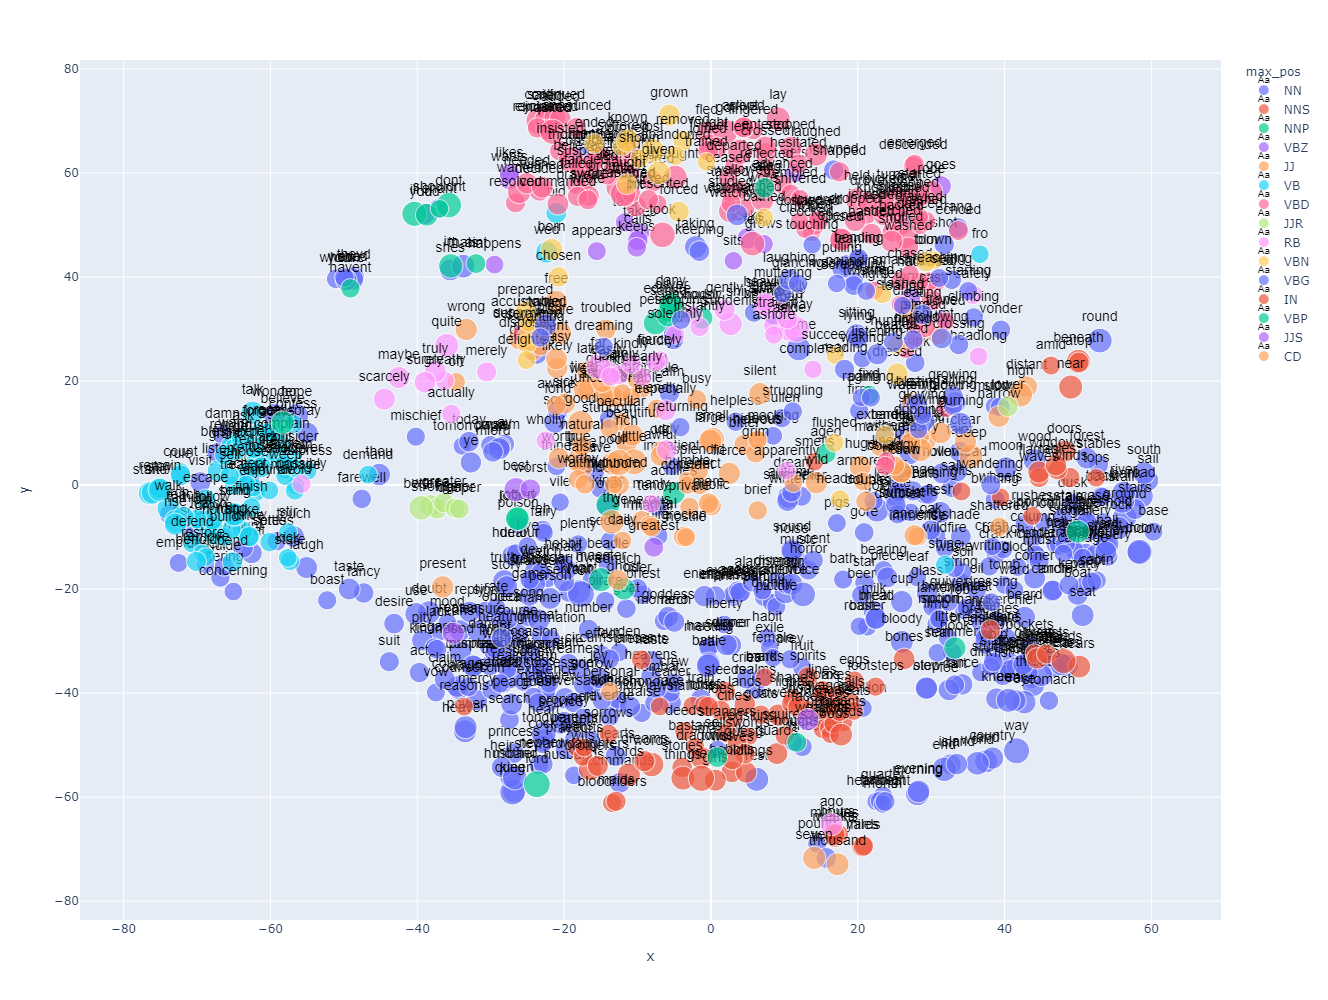

In [20]:
px.scatter(COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='logn',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

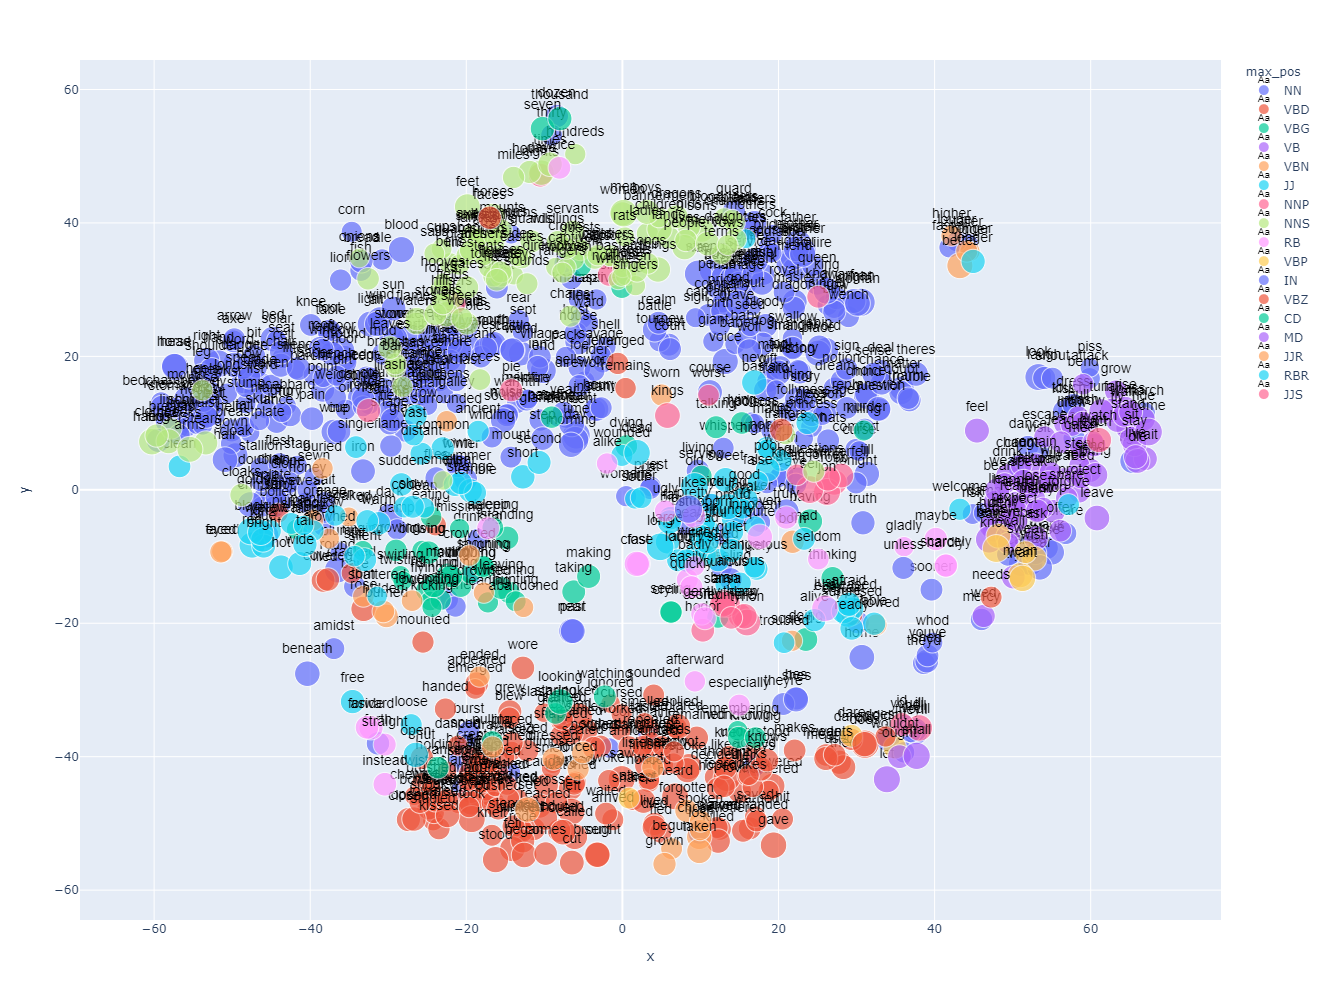

In [18]:
px.scatter(RRM_COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='logn',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

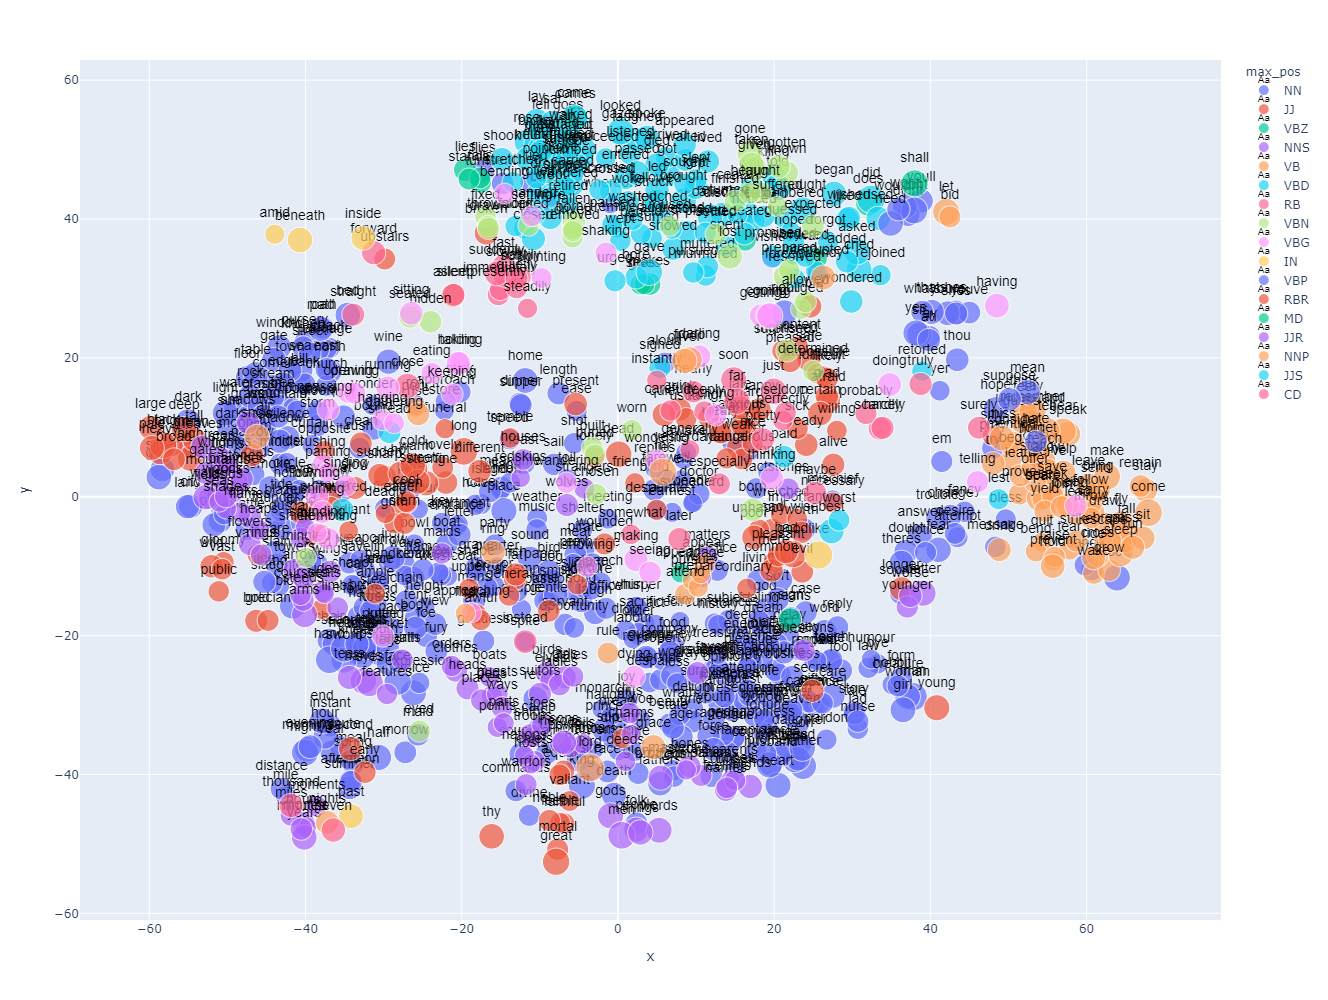

In [19]:
px.scatter(OTHERS_COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='logn',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [33]:
get_most_similar("brother")

,term,sim
0,sister,0.914136
1,uncle,0.901152
2,mother,0.875830
3,cousin,0.862297
4,nephew,0.838934
5,husband,0.836720
6,daughter,0.834567
7,father,0.829979
8,friend,0.803980
9,squire,0.796693


In [34]:
get_most_similar_rrm("brother")

,term,sim
0,sister,0.936290
1,uncle,0.935960
2,mother,0.904875
3,son,0.899289
4,cousin,0.870137
5,daughter,0.851225
6,grandfather,0.849587
7,father,0.835386
8,wife,0.830948
9,friend,0.825647


In [35]:
get_most_similar_others("brother")

,term,sim
0,husband,0.922704
1,conduct,0.906784
2,companion,0.893252
3,soul,0.886500
4,cousin,0.886357
5,uncle,0.880395
6,parents,0.877272
7,mistress,0.872810
8,birth,0.872226
9,wife,0.860044


In [36]:
get_most_similar("love")

,term,sim
0,trust,0.767458
1,pity,0.764842
2,thank,0.747770
3,hate,0.722680
4,complain,0.717844
5,promise,0.717217
6,confess,0.699267
7,shame,0.698928
8,fear,0.688918
9,beg,0.680160


In [37]:
get_most_similar_rrm("love")

,term,sim
0,beg,0.871690
1,thank,0.871461
2,counsel,0.841944
3,ask,0.835466
4,trust,0.834200
5,promise,0.824060
6,pray,0.809581
7,wish,0.801672
8,offer,0.794726
9,blame,0.787829


In [38]:
get_most_similar_others("love")

,term,sim
0,pity,0.838774
1,fancy,0.831311
2,understand,0.805032
3,promise,0.802222
4,desire,0.800645
5,trust,0.797797
6,guess,0.795512
7,honour,0.793576
8,suit,0.789712
9,mind,0.787876
